# Lesson - Machine Learning VII:Linear Regression for Machine Learning

In this lesson, we will explore the techniques associated with the linear regression algorithm in machine learning.
We'll use the dataset on sold houses in Ames, Iowa. The dataset and its explanation can be found [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627) in this [article](https://s3.amazonaws.com/dq-content/307/data_description.txt). Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this course, we'll build models that predict the final sale price from its other attributes. Specifically, we'll explore the following questions:

- Which properties of a house most affect the final sale price?
- How effectively can we predict the sale price from just its properties?


------
## Sec-1 - The Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
data = pd.read_csv('AmesHousing.txt', delimiter = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
train = data.head(1460)
test = data.tail(len(data) - len(train))
print(train.shape)
print(test.shape)

(1460, 82)
(1470, 82)


### Simple (Univariate) Linear Regression

 The following equation is the general form of the simple linear regression model.
 $$\hat{y} = a_1x_1 + a_0$$
 
 y represents the target column while x1 represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand, a0 and a1 represent the parameter values that are specific to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column. The following diagram shows different simple linear regression models depending on the data:
 
 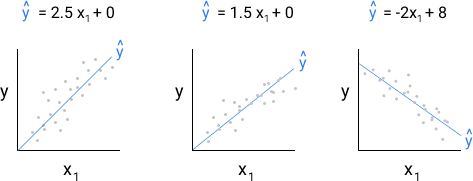
 
The first step is to select the feature, x1, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values a1 and a0 based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

Below, we will analyze three features by plotting them against `SalePrice` to determine correlation.

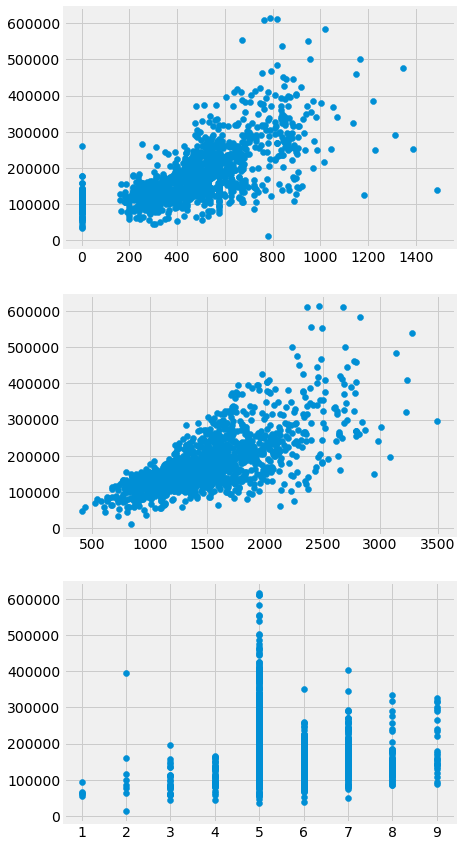

In [4]:
fig = plt.figure(figsize=(7, 15))
plt.style.use('fivethirtyeight')
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(x = train['Garage Area'], y= train["SalePrice"])
ax2 = fig.add_subplot(3,1,2)
ax2.scatter(x = train['Gr Liv Area'], y= train["SalePrice"])
ax3 = fig.add_subplot(3,1,3)
ax3.scatter(x = train['Overall Cond'], y= train["SalePrice"])
plt.show()

From above plots we can decipher that we can tell that the `Gr Liv Area` feature correlates the most with the SalePrice column. We can confirm this by calculating the correlation between pairs of these columns using the `pandas.DataFrame.corr()`[method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html):

In [5]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


### Model Fitting
So we can update our model as under (replacing x1 with `Gr Liv Area`:
$$\hat{y} = a_1*Gr \ Liv \ Area + a_0$$    

**Least Squares**
To find the optimal parameters for a linear regression model, we want to optimize the model's residual sum of squares (or RSS). Residual (often referred to as errors) describes the difference between the predicted values for the target column (y) and the true values (y):
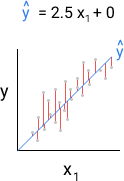

We want this difference to be as small as possible. Calculating RSS involves summing the squared errors:
$$RSS = (y_1 - \hat{y_1})^2 +  (y_2 - \hat{y_2})^2 + ... + (y_n - \hat{y_n})^2$$

We can shorten this to:
$$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

RSS seems very similar to the calculation for MSE (mean squared error), we used earlier. Here's the formula for MSE, adapted for the linear equation:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

Earlier we used the MSE on the test set (while working on k-nearest neighbors), it's clear that the goal of minimizing RSS on the training set when training is a good idea.
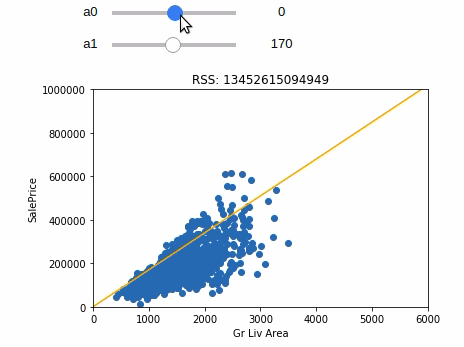

### Using Scikit Learn for Training and Prediction

We will now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library is designed to easily swap and try different models. We will work with the [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. `LinearRegression` fits a linear model with coefficients `w = (w1, …, wp)` to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.The LinearRegression class also has it's own `fit()` method. Specific to this model, however, are the coef_ and intercept_ attributes, which return a1 (a1 to an if it were a multivariate regression model) and a0 accordingly.

Below, we will:
- Import and instantiate a linear regression model.
- Fit a linear regression model that uses the best feature to predict the price using the default arguments.
- Display the coefficient and intercept of the fitted model using the `coef_` and `intercept_` attributes.
- Assign `a1` to `a1` and `a0` to `a0`.

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
a0 = lr.intercept_
a1 = lr.coef_
print(a0)
print(a1)

5366.821710056043
[116.86624683]


### Predictions
Above, we have fit a univariate linear regression model between the Gr Liv Area and SalePrice columns. We then displayed the single coefficient and the residual value. If we refer back to the format of our linear regression model, the fitted model can be represented as:
$$\hat{y} = 116.86624683x_1 + 5366.82171006$$

One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

We can now use the `predict()` method to predict the labels using the training data and compare them with the actual labels. To quantify the fit, we can use mean squared error. We will also perform simple validation by making predictions on the test set and calculate the MSE value for those predictions as well.

Below, we will:

- Use the fitted model to make predictions on both the training and test sets.
- Calculate the RMSE value for the predictions on the training set and assign to `train_rmse`.
- Calculate the RMSE value for the predictions on the test set and assign to `test_rmse`.



In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909


### Multivariate Linear Regression

We can extend this logic to the multivariate case (often called multiple linear regression). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:
$$\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$$

When using multiple features, the main challenge is selecting relevant features. For now, We will train a model using the following columns from the dataset to see how train and test RMSE values are improved.
`Overall Cond`
`Gr Liv Area`

Below, we will:
- Train a linear regression model using the columns in cols.
- Use the fitted model to make predictions on both the training and test dataset.
- Calculate the RMSE value for the predictions on the training set and assign to `train_rmse_2`.
- Calculate the RMSE value for the predictions on the test set and assign to `test_rmse_2`.

In [8]:
cols = ['Overall Cond', 'Gr Liv Area']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

from sklearn.metrics import mean_squared_error
train_mse_2 = mean_squared_error(train_predictions, train['SalePrice'])
test_mse_2 = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse_2 = np.sqrt(train_mse_2)
test_rmse_2 = np.sqrt(test_mse_2)

print(train_rmse_2)
print(test_rmse_2)

56032.398015258674
57066.90779448559


--------
## Sec-2 - Feature Selection

In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. In this section, we'll explore how to use correlation between features and the target column, correlation between features, and variance of features to select features. We'll specifically focus on selecting from feature columns that don't have any missing values or don't need to be transformed to be useful (e.g. columns like Year Built and Year Remod/Add).

Below, we will:

- Using pandas `select_dtypes` method, select the integer and float columns from `train` and assign them to the variable `numerical_train`.
- Drop the following columns from numerical_train:
`PID` (place ID isn't useful for modeling)
`Year Built`
`Year Remod/Add`
`Garage Yr Blt`
`Mo Sold`
`Yr Sold`
- Calculate the number of missing values from each column in numerical_train. Create a Series object where the index is made up of column names and the associated values are the number of missing values:
`Order `               0
`PID`                  0
`MS SubClass`          0
`MS Zoning `           0
...
- Assign this Series object to null_series. Select the subset of `null_series` to keep only the columns with no missing values, and assign the resulting Series object to `full_cols_series`.
- Display `full_cols_series` using the print() function.

In [9]:
numerical_train = train.select_dtypes(include =['int64', 'float64'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis = 1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


### Correlating Features and Target Columns

Earlier, we focused on 4 features in particular and used the pandas.DataFrame.corr() method to return the correlation coefficients between each pair of columns. This means that the correlation matrix for 4 columns results in 16 correlation values:

In [10]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


The subset of features we want to focus on, full_cols_series, contains 25 columns:

In [11]:
train_subset = train[full_cols_series.index]
train_subset.shape[1]

25

The resulting correlation matrix will contain 25 * 25 or 625 correlation values. Comparing and contrasting this many values is incredibly difficult. We will instead focus on just how the feature columns correlate with the target column (SalePrice) instead.

Below, we will:

- Compute the pairwise correlation coefficients between all of the columns in `train_subset`.
- Select just the `SalePrice` column from the resulting data frame, compute the absolute value of each term, sort the resulting Series by the correlation values, and assign to `sorted_corrs`.

In [12]:
sorted_corrs = train_subset.corr()['SalePrice'].abs().sort_values()
print(sorted_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


### Correlation Matrix Heatmap

We now have a list of candidate features to use in our model, sorted by how strongly they're correlated with the `SalePrice` column. For now, let's keep only the features that have a correlation of 0.3 or higher. This cutoff is a bit arbitrary and, in general, it's a good idea to experiment with this cutoff. For example, you can train and test models using different cutoffs and see where your model stops improving. 

The next thing we need to look for is for potential **collinearity** between some of these feature columns. Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

While we can check for collinearity between 2 columns using the correlation matrix, we run the risk of information overload. We can instead generate a [correlation matrix heatmap](https://seaborn.pydata.org/examples/heatmap_annotation.html) using Seaborn to visually compare the correlations and look for problematic pairwise feature correlations. Because we're looking for outlier values in the heatmap, this visual representation is easier.

To generate a correlation matrix heatmap, we need to pass in the data frame containing the correlation matrix as a data frame into the seaborn.heatmap() function.

Below, we will:

- Select only the columns in `sorted_corrs` with a correlation above 0.3 and assign to `strong_corrs`.
- Filter `train_subset` using the indexes of `strong_corr`s and store the correlations to `corrmat`.
- Use the `seaborn.heatmap()` function to generate a correlation matrix heatmap for the columns in `strong_corrs`.

<function matplotlib.pyplot.show(*args, **kw)>

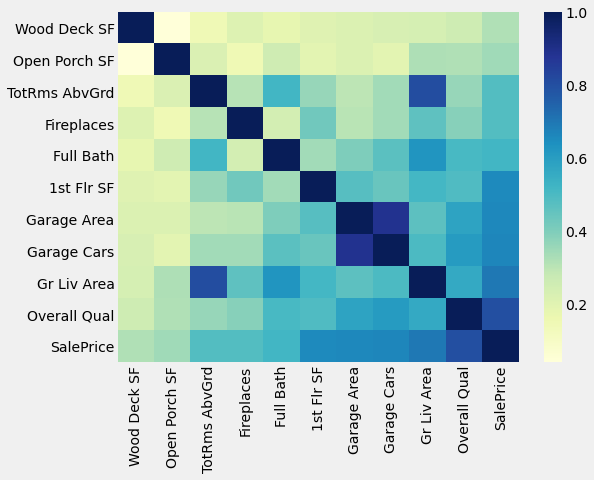

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat, cmap="YlGnBu")
plt.show

### Train and Test Model
Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

`Gr Liv Area` and `TotRms AbvGrd`
`Garage Area` and `Garage Cars`

If we read the descriptions of these columns from the data documentation, we can tell that each pair of columns reflects very similar information. Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, we will drop the TotRms AbvGrd and Garage Cars. After that, we will confirm that the test set contains no missing values for these columns.

Below, we will:

- Filter the test data frame so it only contains the columns from `final_corr_cols.index`. Then, drop the row containing missing values and assign the result to `clean_test`
- Build a linear regression model using the features in features.
- Calculate the RMSE on the test and train sets.
- Assign the train RMSE to train_rmse and the test RMSE to test_rmse.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
test = test[final_corr_cols.index]
test.info()                                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB


In [15]:
clean_test = test.dropna()
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1469 non-null   int64  
 1   Open Porch SF  1469 non-null   int64  
 2   Fireplaces     1469 non-null   int64  
 3   Full Bath      1469 non-null   int64  
 4   1st Flr SF     1469 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1469 non-null   int64  
 7   Overall Qual   1469 non-null   int64  
 8   SalePrice      1469 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 114.8 KB


In [16]:
lr = LinearRegression()
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'
lr.fit(train[features], train[target])
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185851
41032.026120197705


### Rescaling and Removing Features with Low Variance
When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of 0. This would mean that all of the values in that column were exactly the same. This means that the column isn't informative and isn't going to help the model make better predictions.

To make apples to apples comparisons between columns, we need to rescale all of the columns to vary between 0 and 1. This is known as min-max scaling or as rescaling. Here's the formula for rescaling:
$$\dfrac{x - \min(x)} {\max(x) - \min(x)}$$

Where:

x is an individual value
min(x) is the minimum value for the column x belongs to
max(x) is the maximum value for the column x belongs to

Below, we will:

- Select the columns in features from the train data frame. Rescale each of the columns so the values range from 0 to 1, by using train$[features]$ instead of x in the formula above. Assign the result to `unit_train`.
- Calculate and display the column minimum and maximum values of `unit_train` to ensure that all values range from 0 to 1.


In [17]:
unit_train = (train[features] - train[features].min()) / (train[features].max() - train[features].min())
unit_train.describe()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.138207,0.084983,0.198402,0.391438,0.335449,0.318119,0.351245,0.567580
std,0.181836,0.118058,0.215846,0.136459,0.160668,0.142642,0.151916,0.156512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250000,0.211704,0.224798,0.238091,0.444444
50%,0.000000,0.047532,0.333333,0.500000,0.307229,0.322581,0.339274,0.555556
75%,0.251497,0.127971,0.333333,0.500000,0.434703,0.387097,0.429439,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Check variance
print(unit_train.var().sort_values())

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


`Open Porch SF` is the column with lowest variance and the its distance from the next column `Full Bath` is greatest than any two other adjacent values. So we will remove this column from the features.

In [19]:
# final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
# test = test[final_corr_cols.index]
# clean_test = test.dropna()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
features = features.drop('Open Porch SF')
target = 'SalePrice'
lr.fit(train[features], train[target])
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.427024377204


In [20]:
print(data.SalePrice.describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


From original data above it can be seen that the mean price is 180796 and our model has been able to predict within 40591 on the test set. This is still quite high but is most likely the furthest we can go without transforming and utilizing the other features in the dataset. 

------
## Sec-3 - Gradient Descent

Above, we saw how the linear regression model estimates the relationship between the feature columns and the target column and how we can use that for making predictions. In this section and the next, we'll discuss the two most common ways for finding the optimal parameter values for a linear regression model. Each combination of unique parameter values forms a unique linear regression model, and the process of finding these optimal values is known as **model fitting**. In both approaches to model fitting, we'll aim to minimize the following function:
$$MSE = \frac{1}{n} \sum_{i=1}^{n} ({\hat{y_i} - y_i})^2$$

This function is the mean squared error between the predicted labels made using a given model and the true labels. The problem of choosing a set of values that minimize or maximize another function is known as an optimization problem.

To build intuition for the optimization process, we'll start with a single parameter linear regression model:
$$\hat{y} = a_1x_1$$
Note that this is different from simple regression model:
$$\hat{y} = a_1x_1 + a_0$$

We'll use `Gr Liv Area` column for the single parameter:
$$\hat{SalePrice} = a_1 * Gr Liv Area$$

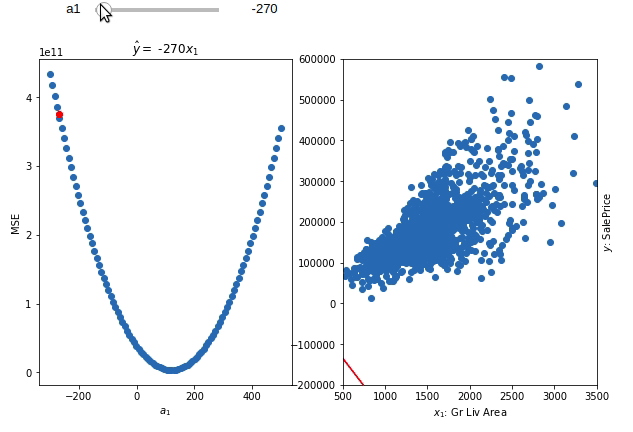

Above, we can observed how the optimization function follows a curve with a minimum value. Using calculus, we can compute the critical points by calculating the curve's derivative, setting it equal to 0, and finding the x value at this point. Unfortunately, this approach won't work when we have multiple parameter values because minimizing one parameter value may increase another parameter's value. In addition, while we can plot the MSE curve when we only have a single parameter we're trying to find and visually select the value that minimizes the MSE, this approach won't work when we have multiple parameter values because we can't visualize past 3 dimensions.

Instead, we'll explore an iterative technique for solving this problem, known as **gradient descent**. The gradient descent algorithm works by iteratively trying different parameter values until the model with the lowest mean squared error is found. Gradient descent is a commonly used optimization technique for other models as well, like neural networks. 

Below is an overview of the gradient descent algorithm for a single parameter linear regression model:

- select initial values for the parameter: a1
- repeat until convergence (usually implemented with a max number of iterations): 
    - calculate the error (MSE) of model that uses current parameter value: $MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)} ) ^2$
    - calculate the derivative of the error (MSE) at the current parameter value: $\frac{d}{da_1} MSE(a_1)$
    - update the parameter value by subtracting the derivative times a constant (α, called the learning rate): $a_1 := a_1 - \alpha \frac{d}{da_1} MSE(a_1)$
    
In the last step of the algorithm, we used := to indicate that the value on the right is assigned to the variable on the left. While in Python, we've used the equals operator (=) for assignment, we've used it in math (=) to signify equality. For example, a = 1 in Python assigns the value 1 to the variable a. In math, a=1 asserts that a is equal to 1. In mathematical papers, sometimes ← is also used to signify assignment:    
$$a_1 \leftarrow a_1 - \alpha \frac{d}{da_1} MSE(a_1)$$

Selecting an appropriate initial parameter and learning rate will reduce the number of iterations required to converge, and is part of **hyperparameter optimization**.

### Derivative of the Cost Function

In mathematical optimization, a function that we optimize through minimization is known as a cost function or sometimes as the loss function. Because we're trying to fit a single parameter model, we can replace $\hat{y}^{(i)}$ with $a_1x_1^{(i)}$ in the cost function:
$$MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} (a_1x_1^{(i)} - y^{(i)} ) ^2$$

We will simplify the derivative of the function to a computable form.

$$\frac{d}{da_1} MSE(a_1) = \frac{d}{da_1} \frac{1}{n} \sum_{i=1}^{n} (a_1x_1^{(i)} - y^{(i)} ) ^2$$

$$\frac{d}{da_1} MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} \frac{d}{da_1} (a_1x_1^{(i)} - y^{(i)} ) ^2$$

We can apply both the power rule and the chain rule to simplify this. 
$$\frac{d}{da_1} MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} 2(a_1x_1^{(i)} - y^{(i)})  \frac{d}{da_1} (a_1x_1^{(i)} - y^{(i)} )$$

Because we are differentiating $a_1x_1^{(i)} - y^{(i)}$ with respect to a1, we treat $y^{(i)}$ and $x_1^{(i)}$ as constants. $\frac{d}{da_1} (a_1x_1^{(i)} - y^{(i)})$ then simplifies to then simplifies to just $x_1^{(i)}$

$$\frac{d}{da_1} MSE(a_1) = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}(a_1x_1^{(i)} - y^{(i)})$$

For every iteration of gradient descent:

- this derivative is computed using the current a1 value
- the derivative is multiplied by the learning rate $\alpha$: $\alpha \frac{d}{da_1} MSE(a_1)$

the result is subtracted from the current parameter value and assigned as the new parameter value: $a_1 := a_1 - \alpha \frac{d}{da_1} MSE(a_1)$

Below, we will write functions to calculate both the derivative and the gradient descent.

In [21]:
def derivative(a1, xi_list, yi_list):
    """calculates derivate at current value of a1
    Args:
    a1(float): parameter of differentiation (co-efficient of equation)
    xi(list): feature
    yi(list): target
    Returns:
    float: derivative with respect to a1"""
    error = 0
    for i in range(0, len(xi_list)):
        error = error + (xi_list[i] * (a1*xi_list[i] - yi_list[i]))
    deriv = 2*error/len(xi_list)   
    return deriv  

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)
                   
                   

In [22]:
# Calculate for 20 iterations, a1 = 150 and alpha = 0.0000003
param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150)
final_param = param_iterations[-1]
final_param

120.14219147202738

### Multi-parameter Gradient Descent
Above, we were concerned with minimizing the following cost function:
$$\displaystyle  MSE(a_1) = \frac{1}{n} \sum\limits_{i=1}^{n} \left(a_1x_1^{(i)} - y^{(i)}\right) ^2$$

When we have 2 parameter values (a0 and a1), the cost function is now a function of two variables, not one:

$$\displaystyle  MSE(a_0, a_1) = \dfrac{1}{n} \sum\limits_{i=1}^{n} \left(a_0 + a_1x_1^{(i)} - y^{(i)} \right) ^2$$

Instead of one update rule, we now need two update rules. We need one for a0:

$$\displaystyle a_0 := a_0 - \alpha \dfrac{d}{da_0} MSE(a_0, a_1)$$
and one for a1:
$$a_1 := a_1 - \alpha \dfrac{d}{da_1} MSE(a_0, a_1)$$

Above, we determined that $\frac{d}{da_1} MSE(a_1)$ worked out to:
$$\displaystyle \frac{2}{n} \sum\limits_{i=1}^{n} x_1^{(i)}\left(a_1x_1^{(i)} - y^{(i)}\right)$$

For the multiparameter case, we need to include the additional parameter:
$$\displaystyle  \dfrac{d}{da_1} MSE(a_0, a_1) = \frac{2}{n} \sum\limits_{i=1}^{n} x_1^{(i)}\left(a_0 + a_1x_1^{(i)} - y^{(i)}\right)$$

and
\displaystyle  \dfrac{d}{da_0} MSE(a_0, a_1) = \frac{2}{n} \sum\limits_{i=1}^{n} \left(a_0 + a_1x_1^{(i)} - y^{(i)}\right)

Below, we will rewrite the `derivative` and `gradient_descent` functions to include the additional parameter.

In [23]:
# derivative wrt a1
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv
# derivative wrt a0
def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv
# Updated gradient_descent
def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)   



In [24]:
# Calculate parameters for given number of iterations, alpha and initial values of a1 = 150 and a0 = 1000
a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)
print(a0_params[-1], a1_params[-1])

999.986114052572 119.53179462379771


### Gradient Descent for Higher Dimensions

Gradient descent scales to as many variables as we want. Each parameter value will need its own update rule, and it closely matches the update rule for a1:

$$
\displaystyle  a_0 := a_0 - \alpha \dfrac{d}{da_0} MSE \\
 a_1 := a_1 - \alpha \dfrac{d}{da_1} MSE \\ 
 a_2 := a_2 - \alpha \dfrac{d}{da_2} MSE \\ 
 \vdots\\
 a_n := a_n - \alpha \dfrac{d}{da_n} MSE \\
 $$
 
Besides the derivative for the MSE with respect to the intercept value (a0), the derivatives for other parameters are identical:

$$
\displaystyle  \dfrac{d}{da_1} MSE = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right) \\  
\displaystyle \dfrac{d}{da_2} MSE = \dfrac{2}{n} \sum_{i=1}^{n} x_2^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right) \\
 \vdots\\
\displaystyle \dfrac{d}{da_n} MSE = \dfrac{2}{n} \sum_{i=1}^{n} x_n^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right)  \\
$$

The main challenges with gradient descent include:

- Choosing good initial parameter values
- Choosing a good learning rate (falls under the domain of hyperparameter optimization)

------
## Sec-4 - Ordinary Least Squares
Above, we explored an iterative technique for model fitting named gradient descent. The gradient descent algorithm requires multiple iterations to converge on the optimal parameter values and the number of iterations is highly dependent on the initial parameter values and the learning rate we select. In this mission, we'll explore a technique called ordinary least squares estimation or OLS estimation for short. 
Unlike gradient descent, OLS estimation provides a clear formula to directly calculate the optimal parameter values that minimize the cost function. To understand OLS estimation, we need to first frame our linear regression problem in the matrix form. So far, we've mostly worked with the following form of the linear regression model:
$$\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$$
While this form represents the relationship between the features (x1 to xn) and the target column (y) well when there are just a few parameter values, it doesn't scale well when we have hundreds of parameters. Matrix notation lets us better represent and reason about a linear system with many variables. With that in mind, here's what the matrix form of our linear regression model looks like:
$$Xa  =  \hat{y}$$

Where X is a matrix representing the columns from the training set our model uses, a is a vector representing the parameter values, and y^ is the vector of predictions. Here's a diagram with some sample values for each:

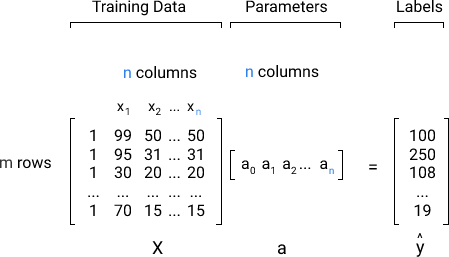

the OLS estimation equation that results in the optimal vector a is given as:
$$a = (X^TX)^{-1} X^Ty$$

Scikit-learn uses OLS under the hood when we call `fit()` on a [LinearRegression instance](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

 We will start by computing OLS estimation to find the best parameters for a model using the features that we have determined above:
 
 
Below, we will:
- Select just the features in features from the training set and assign to `X`.
- Select the SalePrice column from the training set and assign to `y`.
- Use the OLS estimation formula to return the optimal parameter values. Store the estimation to the variable `ols_estimation`

In [25]:
features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual']
X = train[features]
y = train['SalePrice']

ols_estimation_term1 = np.linalg.inv(np.dot(np.transpose(X), X)) 
ols_estimation_term2 = np.dot(np.transpose(X), y)
ols_estimation = np.dot(ols_estimation_term1, ols_estimation_term2)
ols_estimation

array([   53.75693376, 18232.31375751, -6434.65300989,    22.53151963,
          86.81522574,    28.08976713, 11397.64135314])

### Cost Function

Unlike gradient descent, OLS estimation provides what is known as a **closed form solution** to the problem of finding the optimal parameter values. A closed form solution is one where a solution can be computed arithmetically with a predictable amount of mathematical operations. Gradient descent, on the other hand, is an algorithmic approach that can require a different number of iterations (and therefore a different number of mathematical operations) based on the initial parameter values, the learning rate, etc. While the approach is different, both techniques share the high level objective of minimizing the cost function.

error is the difference between the predictions made using the model y^ and the actual labels y, it's represented as a vector. The greek letter for E (epsilon ϵ) is often used to represent the error vector:
$$\epsilon =  \hat{y} - y$$

We can build on this to define y:
$$y = Xa - \epsilon$$

we have 2 unknowns (the vector a and the vector y). We're looking for a model, represented using the parameter vector a, that will minimize the mean squared error between the labels, y, and the predictions, ˆy. Said another way, the cost function is this mean squared error.
Here's what the cost function looks like in matrix form:
$$J(a) = \dfrac{1}{n} (Xa - y)^T(Xa - y)$$



### Derivative of the Cost Function
Complete derivation can be found [here](https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/). The derivative of above given cost function is:
$$\frac{dJ(a)}{da} = 2X^TXa - 2X^Ty$$

To find the vector a that minimizes the cost function J(a), we need to set the derivative equal to 0 and solve for a:

$$2X^TXa - 2X^Ty = 0$$

 move the second term to the right hand side and divide both sides by 2:
 $$X^TXa = X^Ty$$
 
 Our goal is to isolate a, the parameter vector. The last step we need to perform is "divide out" XTX from the left hand side.
 
 e.g. We can cancel A from the following equation Ax=b by multiplying both sides by the inverse $A^{-1}Ax = A^{-1}b$ which leaves us with $x = A^{-1}b$
 
 To cancel $X^TX$ from the left side, we need to compute the inverse of it and multiply it by both sides. We're now left with the OLS estimation formula:

$$a = (X^TX)^{-1}X^Ty$$

### Gradient Descent versus Ordinary Least Squares

The biggest limitation of OLS is that it is computationally expensive when the data is large.  This is because computing a matrix inverse has a computational complexity of approximately O(n^3). More about computational complexity of the matrix inverse and other common matrix operations can be foun on [Wikipedia](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra). 

OLS is commonly used when the number of elements in the dataset (and therefore the matrix that's inverted) is less than a few million elements. On larger datasets, gradient descent is used because it's much more flexible. For many practical problems, we can set a threshold accuracy value (or a set number of iterations) and use a "good enough" solution. This is especially useful when iterating and trying different features in our model.

-------
### Sec-5 - Processing and Transforming Features

To understand how linear regression works, we've stuck to using features from the training dataset that contained no missing values and were already in a convenient numeric representation.  In this section, we'll explore how to transform some of the remaining features so we can use them in our model. Broadly, the process of processing and creating new features is known as [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). Feature engineering is a bit of an art and having knowledge in the specific domain (in this case real estate) can help us create better features. In this section, we'll focus on some domain-independent strategies that work for all problems.  

Initially, we'll focus only on columns that contain no missing values but still aren't in the proper format to use in a linear regression model. Latter, we'll also explore some ways to deal with missing values.

Amongst the columns that don't contain missing values, some of the common issues include:

- the column is not numerical (e.g. a zoning code represented using text)
- the column is numerical but not ordinal (e.g. zip code values)
- the column is numerical but isn't representative of the type of relationship with the target column (e.g. year values)



Below, we'll start by filtering the training set to just the columns containing no missing values:
- Select just the columns from the train data frame that contain no missing values.
- Assign the resulting data frame, that contains just these columns, to `df_no_mv`.

In [26]:
train_null_counts = train.isnull().sum()
df_no_mv = train[train_null_counts[train_null_counts == 0].index]
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Area         1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Lot Shape        1460 non-null   object 
 7   Land Contour     1460 non-null   object 
 8   Utilities        1460 non-null   object 
 9   Lot Config       1460 non-null   object 
 10  Land Slope       1460 non-null   object 
 11  Neighborhood     1460 non-null   object 
 12  Condition 1      1460 non-null   object 
 13  Condition 2      1460 non-null   object 
 14  Bldg Type        1460 non-null   object 
 15  House Style      1460 non-null   object 
 16  Overall Qual     1460 non-null   int64  
 17  Overall Cond  

### Categorical Features

Some of the columns in the data frame df_no_mv contain string values. If these columns contain only a limited set of unique values, they're known as **categorical features**. As the name suggests, a categorical feature groups a specific training example into a specific category. Here are some examples from the dataset:

In [27]:
print(train['Utilities'].value_counts())

AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


In [28]:
print(train['Street'].value_counts())

Pave    1455
Grvl       5
Name: Street, dtype: int64


In [29]:
print(train['House Style'].value_counts())

1Story    743
2Story    440
1.5Fin    160
SLvl       60
SFoyer     35
2.5Unf     11
1.5Unf      8
2.5Fin      3
Name: House Style, dtype: int64


To use these features in our model, we need to transform them into numerical representations. Pandas makes this easy because the library has a special categorical data type. We can convert any column that contains no missing values (or an error will be thrown) to the categorical data type using the `pandas.Series.astype()` method:
```
train['Utilities'] = train['Utilities'].astype('category')
```

When a column is converted to the categorical data type, pandas assigns a code to each unique value in the column. Unless we access these values directly, most of the pandas manipulation operations that work for string columns will work for categorical ones as well.

```
print(train['Utilities'])


AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
5       AllPub

```

We need to use the `.cat` accessor followed by the `.codes` property to actually access the underlying numerical representation of a column:

```
train['Utilities'].cat.codes
```

Below, we will:
- Convert all of the text columns in `train` to the categorical data type.
- Select the `Utilities` column, return the categorical codes, and display the unique value counts for those codes: `train['Utilities'].cat.codes.value_counts()`

In [30]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns
for col in text_cols:
    print(col+":", len(train[col].unique()))


MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


In [31]:
# set as categorical variable
train[text_cols] = train[text_cols].astype('category')


C:\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
#display codes
print(train['Utilities'].cat.codes.value_counts())
print(train['Sale Condition'].cat.codes.value_counts())

0    1457
2       2
1       1
dtype: int64
3    1267
0      98
4      63
2      18
1      14
dtype: int64


### Dummy Coding
When we convert a column to the categorical data type, pandas assigns a number from 0 to `n-1` (where `n` is the number of unique values in a column) for each value. The drawback with this approach is that one of the assumptions of linear regression is violated here. Linear regression operates under the assumption that the features are linearly correlated with the target column. For a categorical feature, however, there's no actual numerical meaning to the categorical codes that pandas assigned for that column. An increase in the Utilities column from `1` to `2` has no correlation value with the target column, and the categorical codes are instead used for uniqueness and exclusivity (the category associated with `0` is different than the one associated with `1`).

The common solution is to use a technique called dummy coding. Instead of having a single column with n integer codes, we have n binary columns. Here's what that would look like for the Utilities column:

>
Utilities_AllPub
Utilities_NoSewr	Utilities_NoSeWa
1	0	0
1	0	0
1	0	0
1	0	0>

Because the original values for the first 4 rows were AllPub, in the new scheme, they contain the binary value for true (1) in the Utilities_AllPub column and 0 for the other 2 columns. Pandas has a convenience function to help us apply this transformation for all of the text columns called `pandas.get_dummies()`.

Below, we will:
- Convert all of the columns in `text_cols` from the `train` data frame into dummy columns.
- Delete the original columns from `text_cols` from the train data frame.

In [33]:
col_dummies = pd.get_dummies(train[text_cols])
train = pd.concat([train, col_dummies], axis = 1)
